In [1]:
## ham veri ile etiket olmadan icindekli kalip-patternlari aliyoruz

In [2]:
from sklearn.datasets import make_blobs

In [6]:
x, y_true = make_blobs(n_samples = 300, centers=4, random_state=42, cluster_std=1.0)

In [13]:
import matplotlib.pyplot as plt

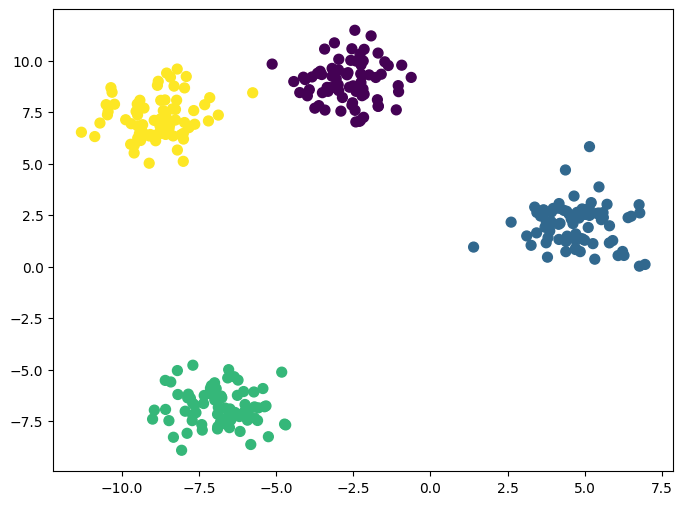

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(x[:,0], x[:,1], c=y_true, s=50)

In [18]:
import pandas as pd

In [70]:
df = pd.read_csv("Mall_Customers.csv")
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [69]:
x = df[ [ "Annual Income (k$)", "Spending Score (1-100)"]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [28]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4)
model.fit(x)

C:\Users\ouz\.conda\envs\python_a\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Sistem belirtilen dosyayı bulamıyor
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\ouz\.conda\envs\python_a\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\ouz\.conda\envs\python_a\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\ouz\.conda\envs\python_a\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\ouz\.conda\envs\python_a\lib\subprocess.py", line 1436, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


KMeans(n_clusters=4)

In [29]:
model.cluster_centers_

array([[25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [87.        , 18.63157895],
       [48.16831683, 43.3960396 ]])

In [30]:
y = model.predict(x) # her veriyi belirledigi grup merkezine gore en yakin gruba atar
y

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 3,
       3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

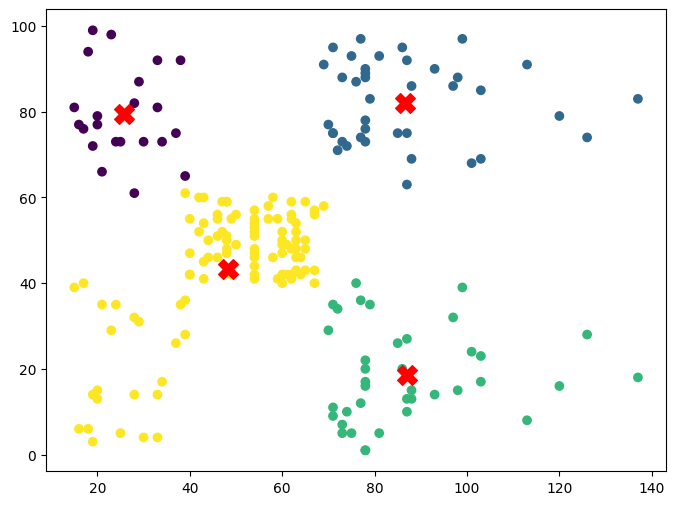

In [35]:
plt.figure(figsize=(8,6))
plt.scatter(x[:,0], x[:,1], c=y)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=200, marker="X", c="red")

In [36]:
model.inertia_

73880.64496247195

In [37]:
# inertia => Her bir noktanın kendi küme merkezine olan uzaklığının karelerinin toplamıdır.

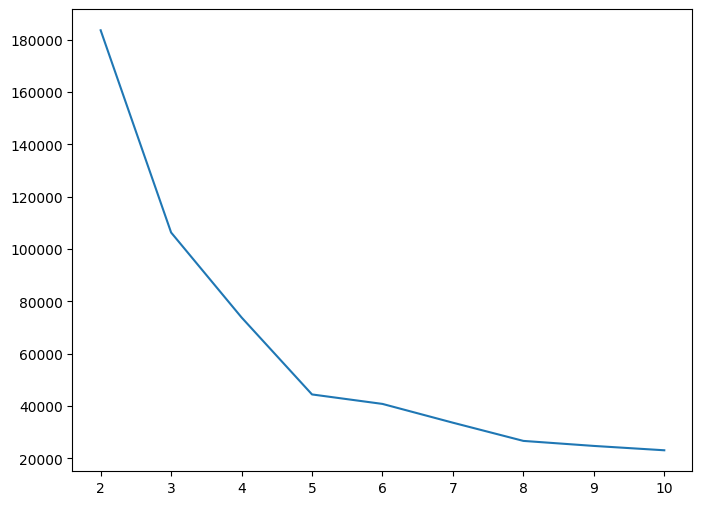

In [39]:
def elbow_method():
    inertias = []
    for k in range(2,11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(x)
        inertias.append(kmeans.inertia_)
    plt.figure(figsize=(8,6))
    plt.plot(range(2,11), inertias)

elbow_method()

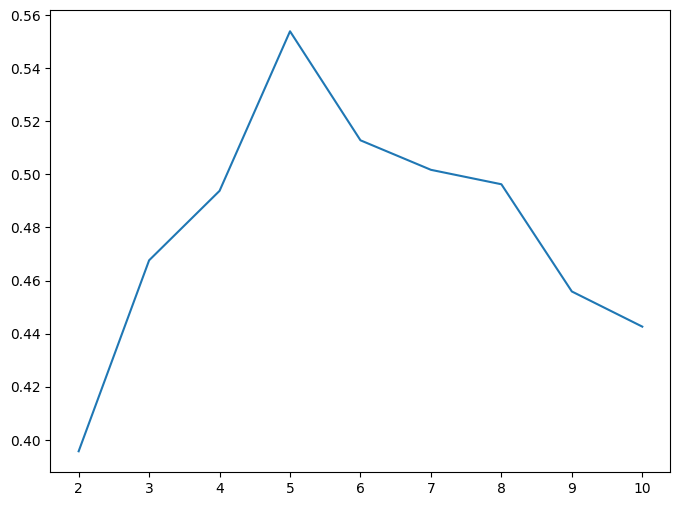

In [42]:
# Silhouette Method -> kendi kümesine yakınlık + diğer kümelere uzaklık 
from sklearn.metrics import silhouette_score

def my_silhouette_method():
    scores = []
    for k in range(2,11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        y = kmeans.fit_predict(x)
        scores.append(silhouette_score(x,y))
    plt.figure(figsize=(8,6))
    plt.plot(range(2,11), scores)
    plt.show()

my_silhouette_method()

## odev

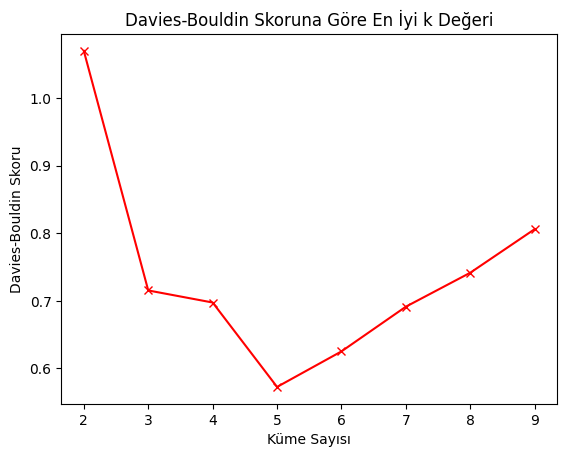

In [68]:
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans
db_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(x)
    score = davies_bouldin_score(x, labels)
    db_scores.append(score)


plt.plot(range(2, 10), db_scores, marker='x', color='red')
plt.xlabel('Küme Sayısı')
plt.ylabel('Davies-Bouldin Skoru')
plt.title('Davies-Bouldin Skoruna Göre En İyi k Değeri')
plt.show()
